/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 * Logistic Regression Accuracy without Min-Max scaling: 0.9649122807017544
 * Logistic Regression Accuracy after Min-Max scaling: 0.9649122807017544
 * KNN Accuracy without scaling: 0.9590643274853801
 * KNN Accuracy with scaling: 0.9649122807017544


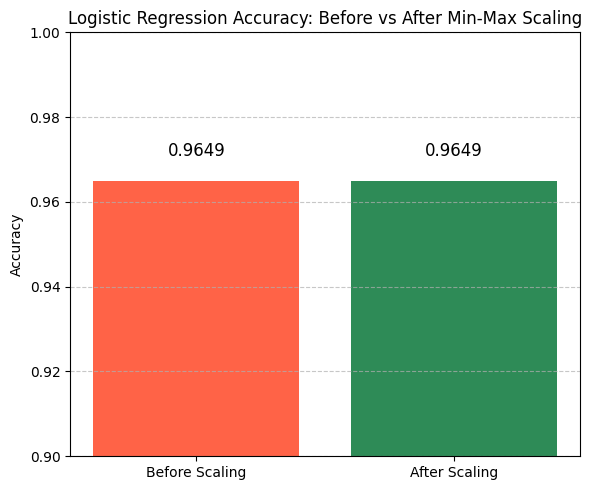

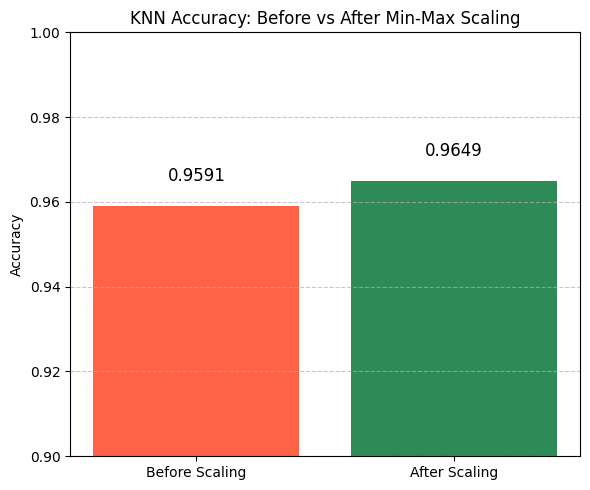

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Logistic Regression ---

# Without scaling
model_unscaled = LogisticRegression(max_iter=200)
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(" * Logistic Regression Accuracy without Min-Max scaling:", acc_unscaled)

# With scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=500)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(" * Logistic Regression Accuracy after Min-Max scaling:", acc_scaled)


# --- KNN ---

# Without scaling
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
y_pred_knn_unscaled = knn_unscaled.predict(X_test)
acc_knn_unscaled = accuracy_score(y_test, y_pred_knn_unscaled)
print(" * KNN Accuracy without scaling:", acc_knn_unscaled)

# With scaling
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
acc_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)
print(" * KNN Accuracy with scaling:", acc_knn_scaled)


# --- Visualization ---

# Bar plot for Logistic Regression
labels = ['Before Scaling', 'After Scaling']
accuracies = [acc_unscaled, acc_scaled]
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, accuracies, color=['tomato', 'seagreen'])
# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             f'{yval:.4f}', ha='center', va='bottom', fontsize=12)
plt.ylim(0.9, 1.0)  # adjust based on your accuracy range
plt.title('Logistic Regression Accuracy: Before vs After Min-Max Scaling')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Bar plot for KNN
labels = ['Before Scaling', 'After Scaling']
accuracies = [acc_knn_unscaled, acc_knn_scaled]
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, accuracies, color=['tomato', 'seagreen'])
# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             f'{yval:.4f}', ha='center', va='bottom', fontsize=12)
plt.ylim(0.9, 1.0)  # adjust based on your accuracy range
plt.title('KNN Accuracy: Before vs After Min-Max Scaling')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()